In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

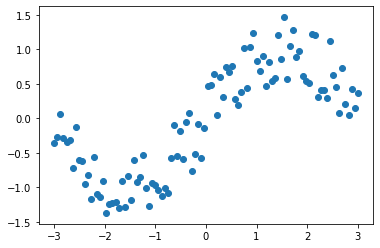

In [16]:
# Generating random data and plotting
n_observations = 100
fig, ax = plt.subplots(1,1)
xs = np.linspace(-3,3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5,0.5,n_observations)
ax.scatter(xs,ys)
fig.show()
plt.draw()

In [5]:
# pows=tf.Variable(initial_value=np.linspace(0, 5, num=5, endpoint=False), dtype=tf.float32)
# inputs=tf.Variable(initial_value=tf.ones(5),dtype=tf.float32)
# weights=tf.Variable(initial_value=tf.random.uniform([5]),dtype=tf.float32)
# tf.math.multiply(tf.math.pow(inputs, pows, name=None),weights)

In [6]:
from tensorflow.keras import layers

class PolyLayer(layers.Layer):
    """
    Create a polynomial layer that can accept
    num_vals: number of different polys
    order: order of the polynomial
        if order=2: poly=w1*x+b
        if order=3: poly=w2*x^2+w1*x+b
    """

    def __init__(self, num_vals=1, order=1):
        super(PolyLayer, self).__init__()
        self.order = order
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(num_vals,self.order),
                                                  dtype='float32'),trainable=True, name="weights")
        
        # No need for a special bias variable because pow(x,0)=1 which represents the bias
        #b_init = tf.zeros_initializer()
        #self.b = tf.Variable(initial_value=b_init(shape=(num_vals,),
        #                                          dtype='float32'), trainable=True, name="bias")
    
        
        self.pows=tf.constant(np.linspace(0, self.order, num=self.order, endpoint=False),dtype=tf.float32)

    def call(self, inputs):
        """ Implements w0+w1*x1+w2*x2^2+w3*x3^3+... """
        #return inputs
        #return tf.math.pow(inputs, self.pows, name=None)
        #return tf.math.multiply(tf.math.pow(inputs, self.pows, name=None),self.w)
        #return tf.reduce_sum(tf.math.multiply(tf.math.pow(inputs, self.pows, name=None),self.w),1)
        
        out = tf.math.pow(inputs, self.pows, name=None)
        out = tf.math.multiply(out,self.w)
        out = tf.reduce_sum(out,1)
        #out = tf.add(out,self.b)
        return out
    
        #return tf.reduce_sum(tf.math.multiply(tf.math.pow(inputs, pows, name=None),weights),0)

num_vals=1
order=1
x = tf.ones((num_vals,1))*2
poly_layer = PolyLayer(num_vals=num_vals,order=order)
y = poly_layer(x)
print(y)


tf.Tensor([-0.11769979], shape=(1,), dtype=float32)


In [7]:
# Create model
model = tf.keras.Sequential()
model.add(PolyLayer(1,4))

In [8]:
# Configure a model for Regression with MSE loss.
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',       # mean squared error
              metrics=['mae'])  # mean absolute error

In [9]:
# Configure a model for Regression with MSE loss
#model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.1),
#              loss='mse', metrics=['mae'])

In [10]:
# Training the model
data = xs
labels = ys

model.fit(data, labels, epochs=10, batch_size=1)

Train on 100 samples
Epoch 1/10
100/100 [==============================] - 0s 2ms/sample - loss: 0.3956 - mae: 0.5389
Epoch 2/10
100/100 [==============================] - 0s 759us/sample - loss: 0.2145 - mae: 0.3934
Epoch 3/10
100/100 [==============================] - 0s 782us/sample - loss: 0.1731 - mae: 0.3338
Epoch 4/10
100/100 [==============================] - 0s 747us/sample - loss: 0.1227 - mae: 0.2763
Epoch 5/10
100/100 [==============================] - 0s 777us/sample - loss: 0.1257 - mae: 0.2933
Epoch 6/10
100/100 [==============================] - 0s 759us/sample - loss: 0.1030 - mae: 0.2610
Epoch 7/10
100/100 [==============================] - 0s 775us/sample - loss: 0.0970 - mae: 0.2534
Epoch 8/10
100/100 [==============================] - 0s 758us/sample - loss: 0.0997 - mae: 0.2590
Epoch 9/10
100/100 [==============================] - 0s 778us/sample - loss: 0.1165 - mae: 0.2762
Epoch 10/10
100/100 [==============================] - 0s 790us/sample - loss: 0.1005 - ma

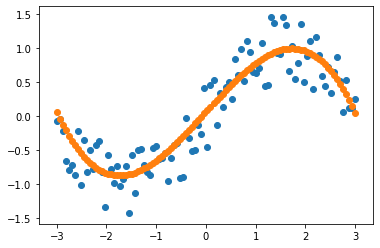

In [11]:
# Printing the figure using the np poly and our coeficients
fig, ax = plt.subplots(1,1)
ys_pred = model.predict(data) # Predicts the data with our model
ax.scatter(xs,ys)
ax.scatter(xs,ys_pred)
fig.show()
plt.draw()

In [12]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
poly_layer_1 (PolyLayer)     multiple                  4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [13]:
# The weights increase in the polynomial order.
fitted_weights = model.layers[0].weights[0].numpy()
print(fitted_weights)

[[ 0.06619292  0.8113731  -0.00129312 -0.09025371]]


In [14]:
# Thus it is necesary to reverse the array to pass it to numpy poly
poly=np.poly1d(np.flip(fitted_weights[0]))

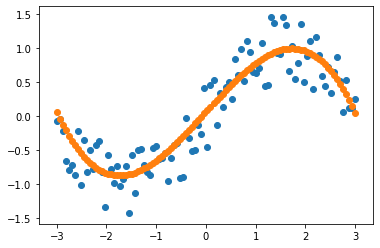

In [15]:
# Printing the figure using the np poly and our coeficients
fig, ax = plt.subplots(1,1)
ypoly_pred = poly(data) # Predicts the data with our model
ax.scatter(xs,ys)
ax.scatter(xs,ypoly_pred)
fig.show()
plt.draw()